# Visualizing The _Iris_ Dataset

## Background

The _Iris flower data set_ is a multivariate dataset collected by the American botanist Edgar Anderson and published by the statistican and biologist Ronald Fisher in a [paper](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) in 1936. Originally used as an example data set on which Fisher's _linear discriminant analysis_ was applied, it became an absolute classic in the field of machine learning - and provides a good starting point for diving into the important field of _data visualization_.

For each of the three investigated iris species 50 samples have been collected. Four _features_ have been investigated: petal (i.e. _Blütenblatt_) length, petal width, sepal (i.e. _Kelchblatt_) length and sepal width.

![](images/iris.png)

## Loading And Exploring The Data

As usual, we'll start with importing the required libraries, loading the data and a first exploration before we dive in.
We'll be using _pandas_ for exploring the data and _seaborn_ for drawing attractive and informative visualizations with just a few lines of code. Since _seaborn_ is based on the (much more complex, but also powerful) _Matplotlib_, we need to import that as well:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This time we're not loading our dataset from a file: Since it's such a classic, the _Iris flower data set_ is included in the example datasets in _seaborn_.

We can print all available demo datasets as follows:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

N.B.: _scikit-learn_ also provides some example datasets - including _Iris_ - in its `sklearn.datasets` package.

Let's load our dataset and perform some typical exploration steps:

In [4]:
iris_data = sns.load_dataset('iris')

In [5]:
iris_data.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
71,6.1,2.8,4.0,1.3,versicolor
23,5.1,3.3,1.7,0.5,setosa
112,6.8,3.0,5.5,2.1,virginica
88,5.6,3.0,4.1,1.3,versicolor
91,6.1,3.0,4.6,1.4,versicolor
15,5.7,4.4,1.5,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
114,5.8,2.8,5.1,2.4,virginica
46,5.1,3.8,1.6,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris_data.groupby('species').agg(['min', 'mean', 'max'])

sepal_length             sepal_width             petal_length  \
                    min   mean  max         min   mean  max          min   
species                                                                    
setosa              4.3  5.006  5.8         2.3  3.428  4.4          1.0   
versicolor          4.9  5.936  7.0         2.0  2.770  3.4          3.0   
virginica           4.9  6.588  7.9         2.2  2.974  3.8          4.5   

                       petal_width              
             mean  max         min   mean  max  
species                                         
setosa      1.462  1.9         0.1  0.246  0.6  
versicolor  4.260  5.1         1.0  1.326  1.8  
virginica   5.552  6.9         1.4  2.026  2.5

## _Boxes, Violins, Strips And Swarms_

Let's see, if a simple **_box plot_** of a specific feature is sufficient to distinguish the three species.
A box plot (sometimes: _box-and-whiskers plot_) is a standardized way of displaying data based on a _five-number summary_, consisting of the five most important sample percentiles: the minimum, the first quartile, the sample median, the third quartile and the maximum. It is constructed as follows:

1. A box is drawn from the first (_Q1_) to the third (_Q3_) quartile (i.e. from the 25th to the 75th percentile).
    * The distance in between is called the _interquartile range_ (or _IQR_).
1. The line in the box is drawn at the median (i.e. the 50th percentile).
1. A distance of 1.5 times the _IQR_ is measured below the first quartile and a whisker is drawn from the smallest observed point that falls within this interval up to _Q1_.
1. A distance of 1.5 times the _IQR_ is measured above the third quartile and a whisker is drawn from the largest observed point that falls within this interval down to _Q3_.
1. All observations below or above the whiskers - i.e. lower than $Q1 - 1.5 * IQR$ or greater than $Q3 + 1.5 * IQR$ - are marked as outliers.

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

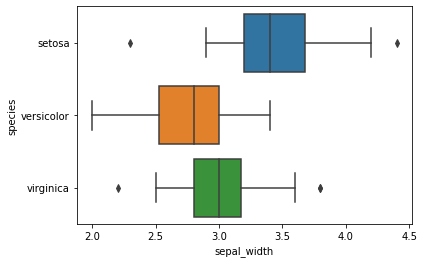

In [11]:
sns.boxplot(data=iris_data, x='sepal_width', y='species')

The plot above uses 1.5 times the _IQR_ as distance from the first and third quartiles to determine the outliers. This definition and proportion were proposed by American mathematician and statistician John Tukey and are used as default value. This can be changed using the `whis`-parameter by either providing a different proportion (i.e. a single value) or a sequence to set the the whiskers at specific percentiles of the data:

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

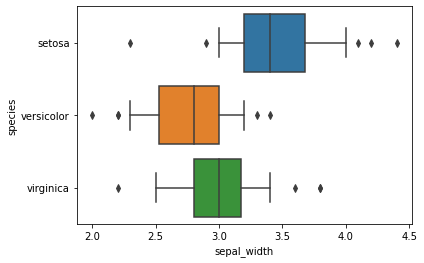

In [12]:
sns.boxplot(data=iris_data, x='sepal_width', y='species', whis=[5,95])

Since the data ranges for this feature overlap for the respective species, an identification can not be accomplished. Let's look at the remaining features by using _Matplotlib_'s `subplots`:

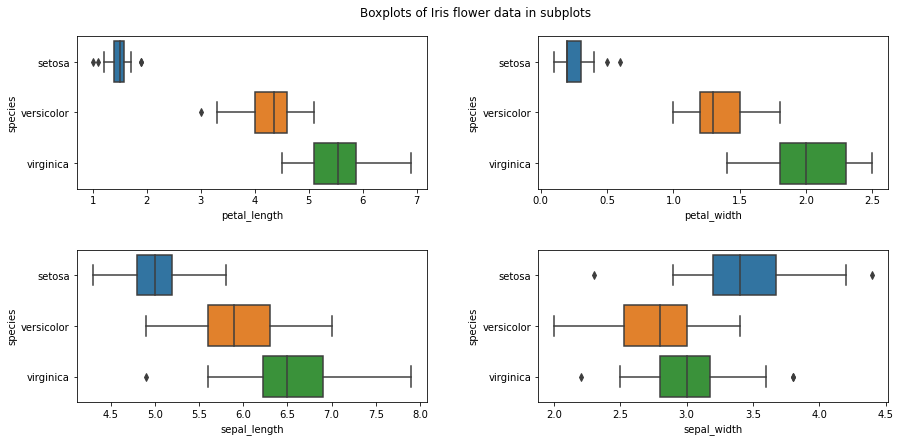

In [13]:
fig, axes= plt.subplots(2,2, figsize=(12, 6)) # 2x2 subplots
fig.suptitle('Boxplots of Iris flower data in subplots')
fig.tight_layout(h_pad=4, w_pad=8) # adjust height- and width padding (distances between plots)
sns.boxplot(data=iris_data, x='petal_length', y='species', ax=axes[0, 0],) # horizontal orientation
sns.boxplot(data=iris_data, x='petal_width', y='species',  ax=axes[0, 1],)
sns.boxplot(data=iris_data, x='sepal_length', y='species', ax=axes[1, 0],)
sns.boxplot(data=iris_data, x='sepal_width', y='species',  ax=axes[1, 1],);

One can see, that _petal length_ and _petal width_ already allow for a separation of _setosa_. However a
combination of features will be necessary for a considerable separation of _versicolor_ from _virginica_
(see later).

A **_violin plot_** plays a similar role as a _box-and-whiskers plot_ by showing the distribution of quantitative data and allowing a comparison when using multiple categorical variables. But, unlike a box plot, the violin plot displays the underlying distribution by using a _kernel density estimation_ (or _KDE_ for short): a mathematical method to estimate the unknown data distribution in form of a continuous function considering the data set as a random sample of that distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

Let's try it out on the _petal width_, which seems promising according to the box plots above. We switched the `x`- and `y`-axis for demonstration purposes - allowing you to guess the origin of the plot type's name.

<AxesSubplot:xlabel='species', ylabel='petal_width'>

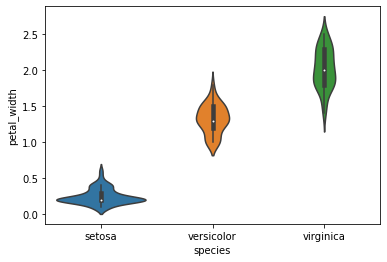

In [14]:
sns.violinplot(data=iris_data, x='species', y='petal_width')

We can use the `inner` parameter to select the violins interior: The default is `box`, for displaying a miniature box plot. We can also display the quartiles as follows:

<AxesSubplot:xlabel='species', ylabel='petal_width'>

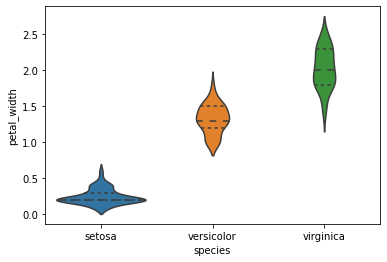

In [15]:
sns.violinplot(data=iris_data, x='species', y='petal_width', inner='quartile')

**_Strip plots_** pose another good alternative - or a complement - to box and violin plots. In this visualization technique the values are plotted as dots _scattered_ along an axis. To avoid overlapping some random _jitter_ is added perpendicular to the numerical axis - try the code below with the parameter `jitter=False` added, and you'll see the difference:

<AxesSubplot:xlabel='species', ylabel='petal_width'>

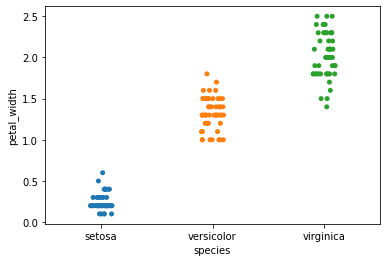

In [16]:
sns.stripplot(data=iris_data, x='species', y='petal_width')

Strip plots are especially useful in combination with box or violin plots, allowing us to show all observations along with some representation of the underlying distribution.

Since _Jupyter Notebook_ reuses the same _figure_, we can easily create a combination of two plots as seen in the example below, showing both distribution and observations of the _petal length_. We adjusted the violin plot's color for better readability.

N.B.: If you want to create multiple plots in different figures, you can use `plt.figure()`. Insert a call _between_ the lines below and see for yourself.

<AxesSubplot:xlabel='species', ylabel='petal_length'>

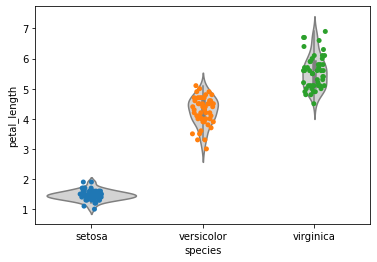

In [17]:
sns.violinplot(data=iris_data, x='species', y='petal_length', color='lightgray')
sns.stripplot(data=iris_data, x='species', y='petal_length')

Lastly, let's take a look at a close relative of the strip plot: the **_swarm plot_** (or _beeswarm_). While being nearly identical, the latter technique adjusts the points along the categorical axis so they don't overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations - try out the example below with a higher `size` parameter and you'll see.

<AxesSubplot:xlabel='species', ylabel='petal_length'>

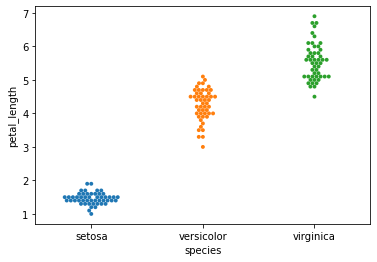

In [18]:
sns.swarmplot(data=iris_data, x='species', y='petal_length', size=3.9)

The features _petal length_ and _petal width_ obviously allow an identification of the species _setosa_, but _versicolor_ and _virginica_ are still not separable.

## _Histograms_ And _Density Plots_

**_Histograms_** are another widely used visualization technique used for creating a representation of the distribution of numerical data. This happens by dividing the range of values into smaller, non-overlapping intervals (so called _bins_) and counting how many values fall into each of these intervals.

Now let's address the separation of _virginica_ and _versicolor_ by looking at the feature _sepal length_ for each species with different `bin` sizes - note the usage of the `hue` parameter for mapping a categorical variable to the color of the bars. 

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

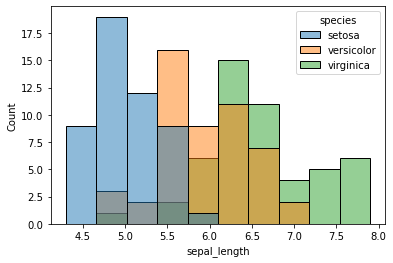

In [19]:
sns.histplot(data=iris_data, x="sepal_length", hue='species',  bins=10)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

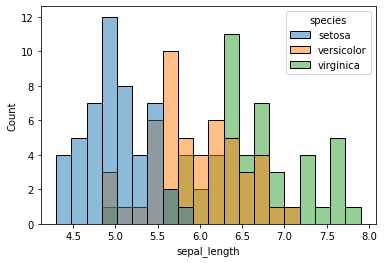

In [20]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', bins=20)

Let's use another plot type you'll already recognize from our violins: A _kernel density estimate plot_ (or _KDE plot_) works analogous to a histogram, but represents the data as a continous curve. Note the use of the `shade` parameter, determining if the area under the curve should be filled.

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

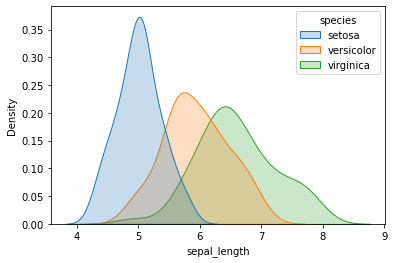

In [21]:
sns.kdeplot(data=iris_data, x='sepal_length', hue='species', shade=True)

We can also combine both visualiziation techniques by simply using the `kde`-parameter when plotting a histogram:

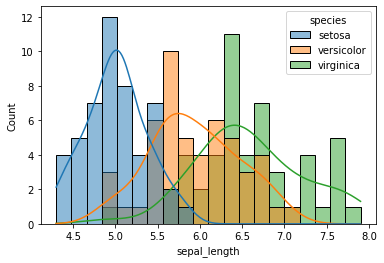

In [22]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, bins=20);

As you see, the three species overlap significantly. Let's use a `for`-loop to iterate and create a separate histogram for each feature:

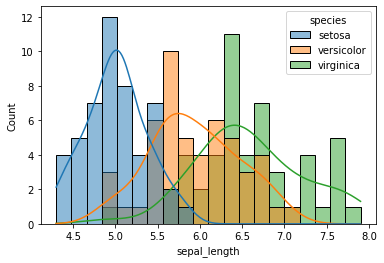

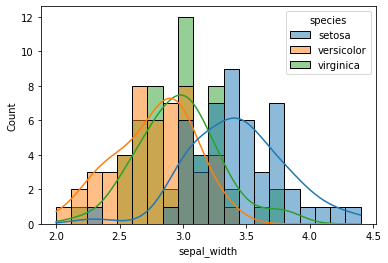

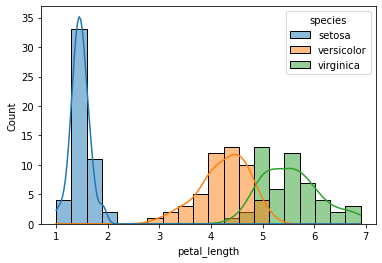

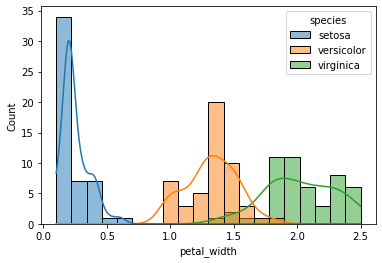

<Figure size 432x288 with 0 Axes>

In [23]:
feature_columns = iris_data.columns.values.tolist();
for curr_feature_column in feature_columns[:-1]:
    sns.histplot(data=iris_data, x=curr_feature_column, hue='species', kde=True, bins=20)
    plt.figure() #create figure for each plot, otherwise all plots will show up in the same figure

## _Bivariate Plots_

While we clearly saw, that _sepal length_ and _sepal width_ had a lot of overlaps in the histograms - maybe a combination of both would enable the identification of the species?

Let's try it out with a **__scatter plot__**, which could be described as a _strip plot_ in two dimensions. By adding a `hue` we can add a third dimension - be it by shape (e.g. squares, circles, triangles...), color or size.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

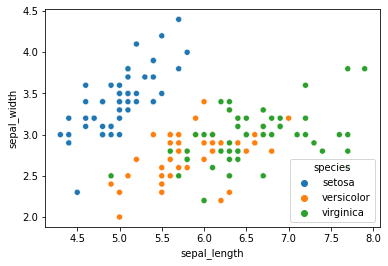

In [24]:
sns.scatterplot(data=iris_data, x="sepal_length", y="sepal_width", hue='species')

What we have here is a _bivariate_ plot, showing the relationship between two variables that have been measured on a single sample. Such a plot permits you to recognize patterns in the data at a glance! In contrast, so far we have only worked with _univariate_ plots, in which we considered only one variable of interest at a time.

We can also use histograms and _KDE_ plots for bivariate visualizations. In the examples in the last section, we only set one axis parameter. Take a look what happens, when we set both:

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

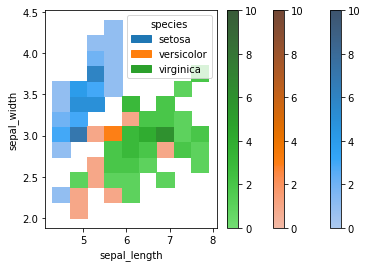

In [25]:
sns.histplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', cbar=True)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

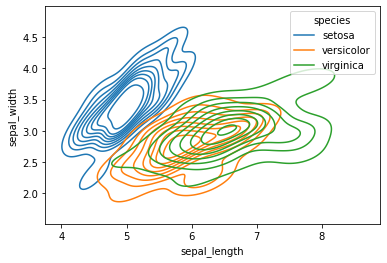

In [26]:
sns.kdeplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species')

Notice something by looking at the plots? While _versicolor_ and _virginica_ still overlap, we can now identify a cluster of _setosa_ flowers by using _sepal length_ and _sepal width_ - we would not have seen that in the one-dimensional visualizations!

To underline this observation, _seaborn_ even allows us to combine uni- and bivariate plots using a **_joint plot_**:

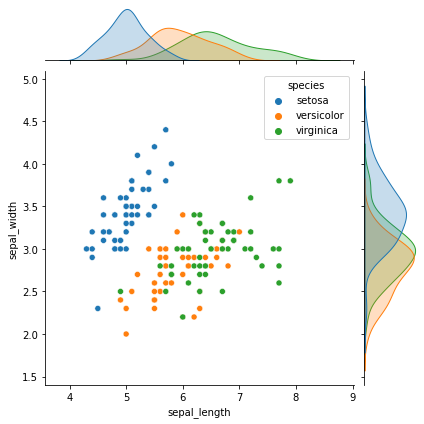

In [27]:
sns.jointplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species')

While offering us some combinations out-of-the-box by changing the `kind` parameter - try out `hex` and `kde` for instance - the joint plot is a high-level interface for `JointGrid`, which allows full control of the visualizations used:

<AxesSubplot:xlabel='Density', ylabel='sepal_width'>

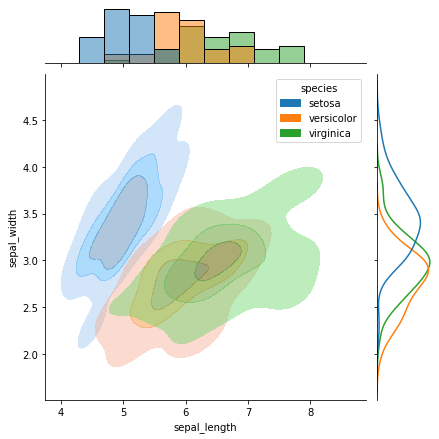

In [28]:
joint_grid = sns.JointGrid()
sns.kdeplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', fill=True, alpha=0.4, levels=4, ax=joint_grid.ax_joint)
sns.histplot(data=iris_data, x='sepal_length', hue='species', legend=False, ax=joint_grid.ax_marg_x)
sns.kdeplot(data=iris_data, y='sepal_width', hue='species', legend=False, ax=joint_grid.ax_marg_y)

## _Pair Plots_ And _Correlation_

Convieniently, _seaborn_ offers a very comfortable plotting class to investigate all possible combinations of numerical features - the **_pair plot_**, allowing us to quickly identify the most meaninful combinations of features for categorization.

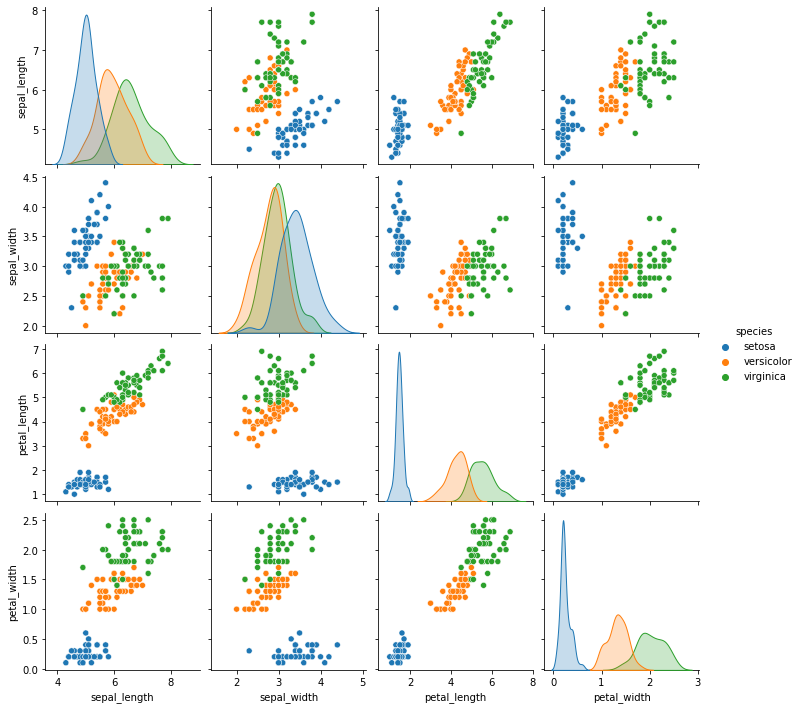

In [29]:
sns.pairplot(data=iris_data, hue='species')

Internally, a _pair plot_ in _seaborn_ is just a high-level interface for its `PairGrid`, which we can access and modify as follows:

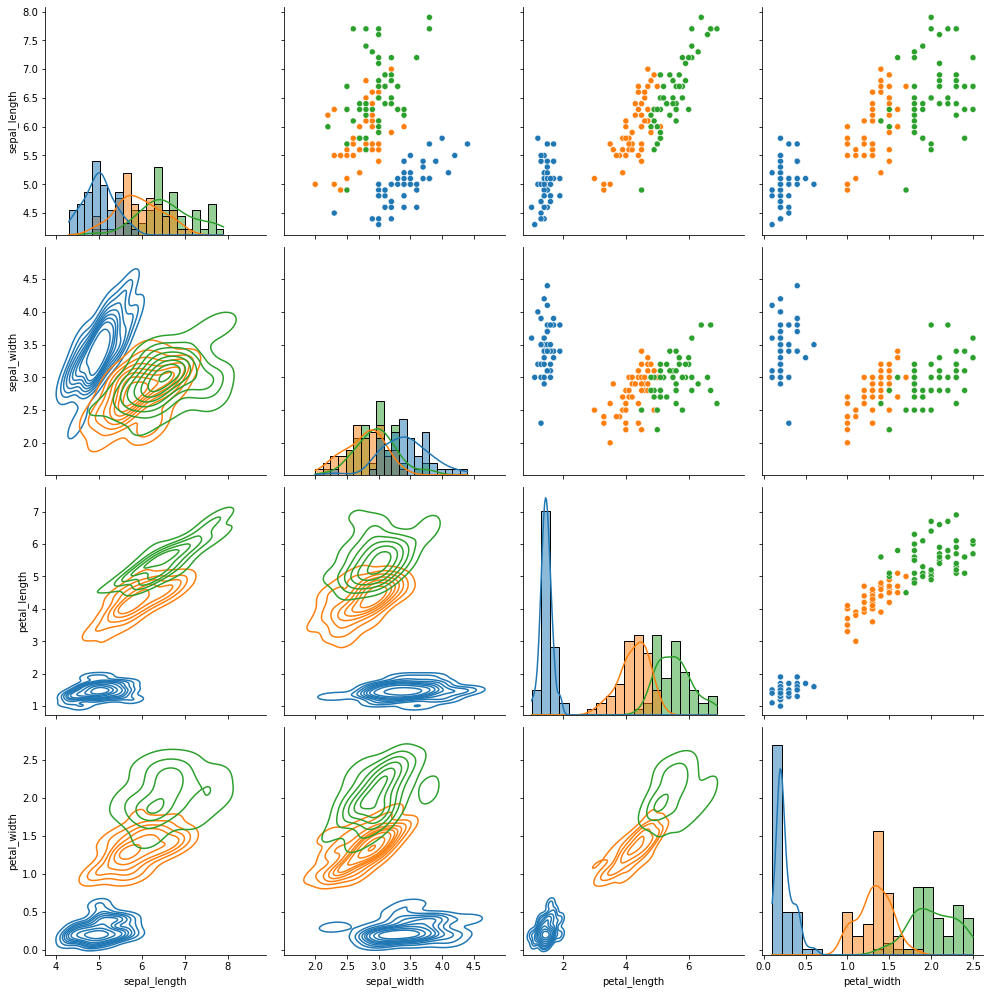

In [30]:
# plot redundance in different plot style (kdeplot)
pair_grid = sns.PairGrid(iris_data, hue='species', height=3.5, layout_pad=0.2)
pair_grid.map_diag(sns.histplot, bins=20, kde=True) # plots of main diagonal
pair_grid.map_upper(sns.scatterplot) # plots above the main diagonal
pair_grid.map_lower(sns.kdeplot, legend=True); # plots below the main diagonal

The plots above again illustrate, that the combination of _petal length_ and _petal width_ are particularly suitable for the categorization of the three species. These two features also show a clearly positive **_correlation_**, which means larger values of petal length imply larger values of sepal width. In contrast sepal length and sepal width show a slightly negative correlation. The correlation matrix holds the correlation coefficients of all feature combinations:

In [31]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


The correlation matrix may be illustrated in a heatmap. Here lighter colors mean higher, positive correlation:

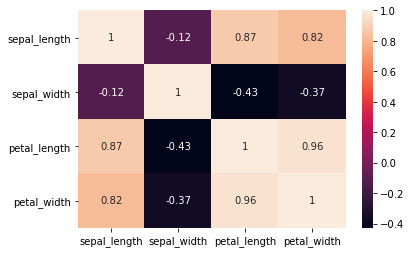

In [32]:
sns.heatmap(iris_data.corr(), annot=True); # plot heatmap of the correlation matrix, annotation enabled

# Colors

Time for a quick break: Let's talk about colors.

When creating a data visualization, our goal is to communicate the insights found in the data. While our primary objective should be picking colors that make our data easily readable, it should also be aesthetically pleasing.

_seaborn_ already provides a nice _color palette_ - we can take a closer look at it like this:

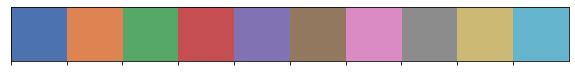

In [34]:
default_palette = sns.color_palette('deep')
sns.palplot(default_palette)

Apart from its variations `muted`, `pastel`, `bright`, `dark` and `colorblind` (try them out!), _seaborn_ also allows us to use palettes from the _ColorBrewer_-tool - an online tool made for finding suitable color schemes for maps and diagrams.

The color palettes are divided into three categories:

* A **diverging** color palette is used for coding ordered/numeric information around a central neutral value, i.e. where colors diverge from neutral to two extremes.
* A **sequential** palette is designed for coding ordered/numeric information, i.e. going from high to low (or vice versa).
* A **qualitative** palette is used when the variable is categorical in nature. Categorical variables are those that take on distinct labels without inherent ordering.

![](images/color_brewer.jpg)



We can access and display the color palettes as follows:

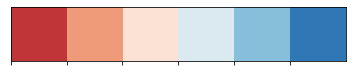

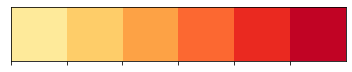

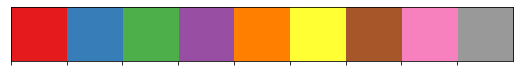

In [45]:
sns.palplot(sns.color_palette('RdBu'))
sns.palplot(sns.color_palette('YlOrRd'))
sns.palplot(sns.color_palette('Set1'))

We can use the names of these palettes directly where a `palette` is expected. Let's try it out by creating three plots using different palettes - a _diverging_ one, a _qualitative_ one and a _sequential_ one.

<Figure size 432x288 with 0 Axes>

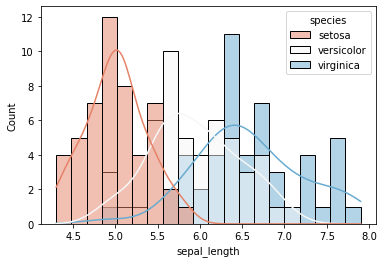

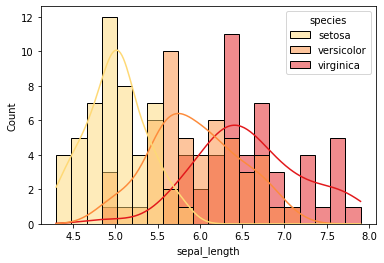

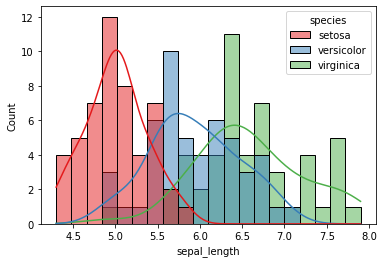

<Figure size 432x288 with 0 Axes>

In [35]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='RdBu', bins=20);
plt.figure()
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='YlOrRd', bins=20);
plt.figure()
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='Set1', bins=20);
plt.figure()

It's obvious, which palette suits our last problem best - a _qualitative_ one allows us to easily distinguish categorical variables.

Of course we can also create our own palettes, since `color_palette()` accepts a list of colors. We can use hexadecimal colors or - to combine practicality and fun - use named colors from the _xkcd color survey_: A crowdsourced effort to name random colors, resulting in some hilarious results.

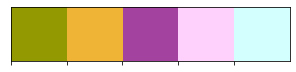

In [36]:
funny_colors = sns.xkcd_palette(['pea soup', 'macaroni and cheese', 'ugly purple', 'pale mauve', 'really light blue'])
sns.palplot(funny_colors)

We can again use the `palette` parameter of a specific plot:

<AxesSubplot:xlabel='species', ylabel='petal_length'>

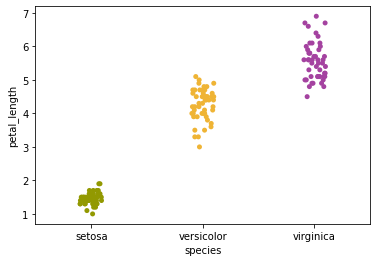

In [37]:
sns.stripplot(data=iris_data, x='species', y='petal_length', palette=funny_colors)

Or use `set_palette` to set the palette for all plots - we're going with a sequential one for the following example:

In [38]:
sns.set_palette('YlOrRd')

# Visualizing Student Performance

## Background

While giving us a great starting point into the field of data visualization, the _Iris_ dataset unfortunately has only one categorical variable. To demonstrate how we could work with more categorical variables, we'll be using the _Student Performance_ data, which was obtained through surveys of students in maths (`student-mat.csv`) and Portuguese (`student-por.csv`) courses in two secondary schools in Portugal.

The data contains lots of interesting social, gender and study information that we can use, such as:

* Gender, age and living situation.
* The parents' education and job status.
* The amount of free time and study time.
* The amount of alcohol consumed during the week and on weekends.
* The grades of both periods as well as the final one - note that Portugal uses a range from 0 to 20!

You can find more details about the columns in a text file provided in this demonstration's `input`-folder.

![](images/students_portugal.jpg)

## Loading And Exploring The Data

Let's again start with a quick exploration of the data we're dealing with. For this demo we'll just be using the survey data from the maths course.

In [39]:
student_data = pd.read_csv('input/student-mat.csv')

In [40]:
student_data.sample(n=10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
255,GP,M,17,U,LE3,T,1,1,health,other,...,4,4,4,1,2,5,2,7,9,8
25,GP,F,16,U,GT3,T,2,2,services,services,...,1,2,2,1,3,5,14,6,9,8
73,GP,M,16,U,GT3,T,3,1,other,other,...,5,3,2,2,2,5,2,12,12,14
378,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,0,15,15,15
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,5,3,2,1,1,5,0,13,13,14
313,GP,F,19,U,LE3,T,3,2,services,other,...,4,2,2,1,2,1,22,13,10,11
310,GP,F,19,U,LE3,T,1,2,services,services,...,4,2,4,2,2,3,0,9,9,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
238,GP,F,17,R,GT3,T,2,1,at_home,services,...,2,1,1,1,1,3,2,13,11,11


In [41]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [42]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## _Small Multiples_

A technique we can utilize for data with more categorical variables is *__small multiples__* - also commonly called as _lattice charts_, _trellis charts_, _grid charts_ or _panel charts_. The idea is to draw multiple instances of the same plot (using the same scale and axes!) on different subsets of our dataset. We can use three dimensions to represent different _facets_ of our data: hue, _rows_ and _columns_.

Let's try to investigate a relation between the number of `absences` and the final grade (`G3`) considering the student's `sex` (as hue), `romantic` relationship status (as rows) and whether they want to pursue `higher` education (as columns). We'll use a `relplot` for this:

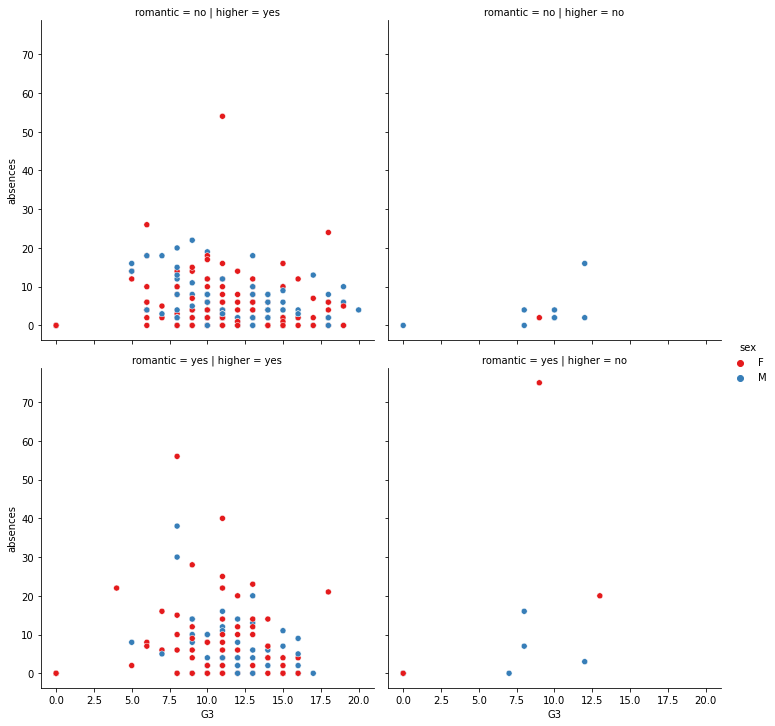

In [43]:
sns.relplot(data=student_data, x='G3', y='absences', col='higher', row='romantic', hue='sex', kind='scatter', palette='Set1')

Of course we can also visualize relationships between a numerical and categorical variables - we'll use a `catplot` for that. Let's use _violins_ and _strips_ to investigate whether we can find connections between the amount of `studytime` (1 is the lowest, 4 is the highest) and the final grade. Note the use of the `cut`-parameter to cut off our _violins_ to prevent seemingly illegal values (i.e. grades outside the valid range).

N.B.: As you're surely noticing, we choose the visualization method using the `kind`-parameter. Most (if not all?) of these are simply the names of the corresponding method without the _plot_-suffix- e.g. `box` $\rightarrow$ `sns.boxplot`.

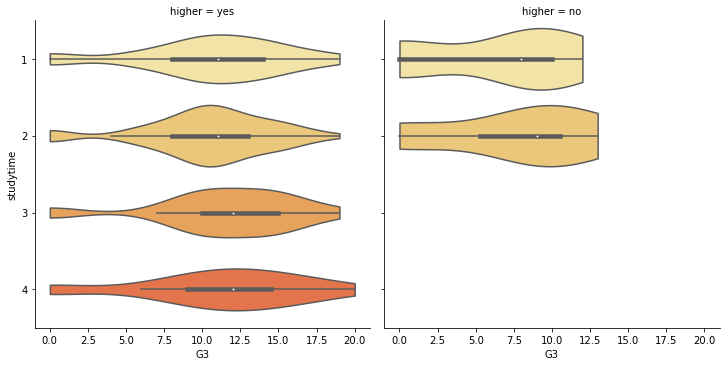

In [46]:
sns.catplot(data=student_data, x='G3', y='studytime', col='higher', kind='violin', orient='h', cut=0)

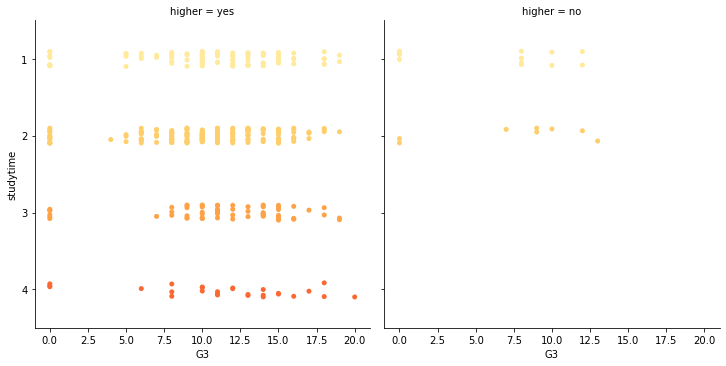

In [47]:
sns.catplot(data=student_data, x='G3', y='studytime', col='higher', kind='strip', orient='h')

Another interesting aspect is the students' alcohol consumption - divided into the numeric (from _very low_ to _very high_) variables `Dalc` for the alcohol consumption on workdays and `Walc` on the weekends. Do you think it has an influence on the final grade?

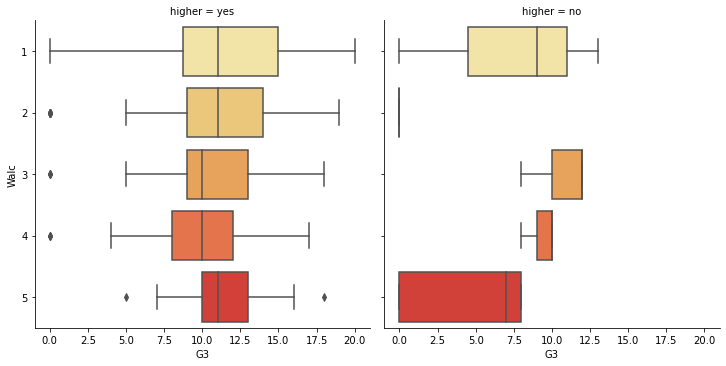

In [48]:
sns.catplot(data=student_data, x='G3', y='Walc', col='higher', kind='box', orient='h')

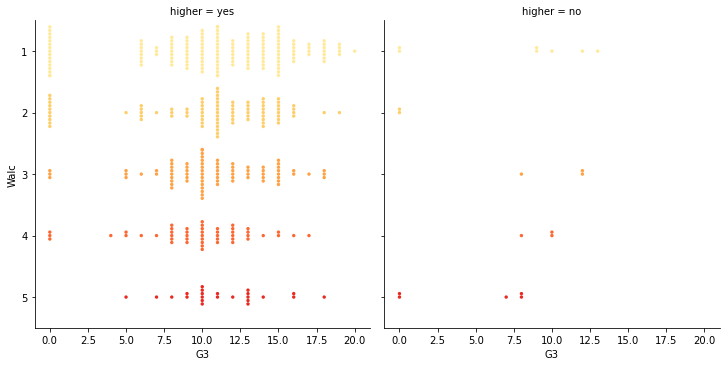

In [49]:
sns.catplot(data=student_data, x='G3', y='Walc', col='higher', kind='swarm', orient='h', s=3.4)

As you probably noticed, we can't easily _overlay_ those figures like we did in the _Iris_ demonstration. Since `catplot` and `relplot` are just easy-to-use interfaces for `FacetGrid`, some features and flexibility are missing when creating grid charts - such as overlaying and _KDE_ plots.

The following demonstration uses a _KDE_ plot inside a `FacetGrid` to investigate the weekend consumption of alcohol by gender and the desire of pursuing higher education:

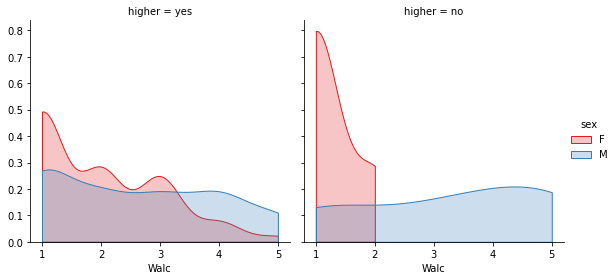

In [50]:
sns.FacetGrid(data=student_data, hue="sex", col="higher", height=4, palette='Set1').map(sns.kdeplot, "Walc", shade=True, cut=0).add_legend();

It seems that there's a lot of girls not pursuing higher education who drink very few alcohol. Is this really the case?

Let's use a *__count plot__*, which is basically a histogram across a categorical column:

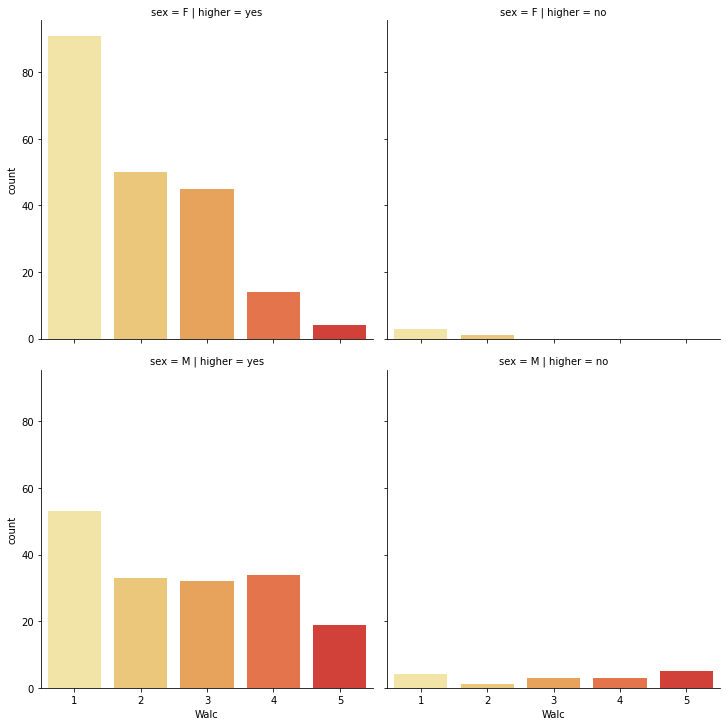

In [51]:
sns.catplot(data=student_data, x='Walc', col='higher', row='sex', kind='count')

As we see, there's very few girls not wanting to pursue higher education. Since a _KDE_ plot only plots relative numbers, we have to be cautious to not come to wrong assumptions like the one above.

Another visualization technique that can help us in this case is a **_bar plot_**, which you're definitely familiar with from everyday life, e.g. from elections. In _seaborn_, each bar shows an estimate - which is the _mean_ value by default, but can be changed by passing an `estimator` function - and an **_error bar_**, that helps to indicate the estimated error or uncertainty to give a general sense of how precise a measurement is, by using the _confidence interval_ (default with 95%, which corresponds to twice the standard deviation; 68% would be the single one) or the standard deviation (with the parameter `ci='sd'`).

The length of an error bar helps reveal the uncertainty of a data point: a short error bar shows that values are concentrated, signalling that the plotted average value is more likely, while a long error bar would indicate that the values are more spread out and less reliable. Also depending on the type of data, the length of each pair of error bars tend to be of equal length on both sides. However, if the data is skewed, then the lengths on each side would be unbalanced.

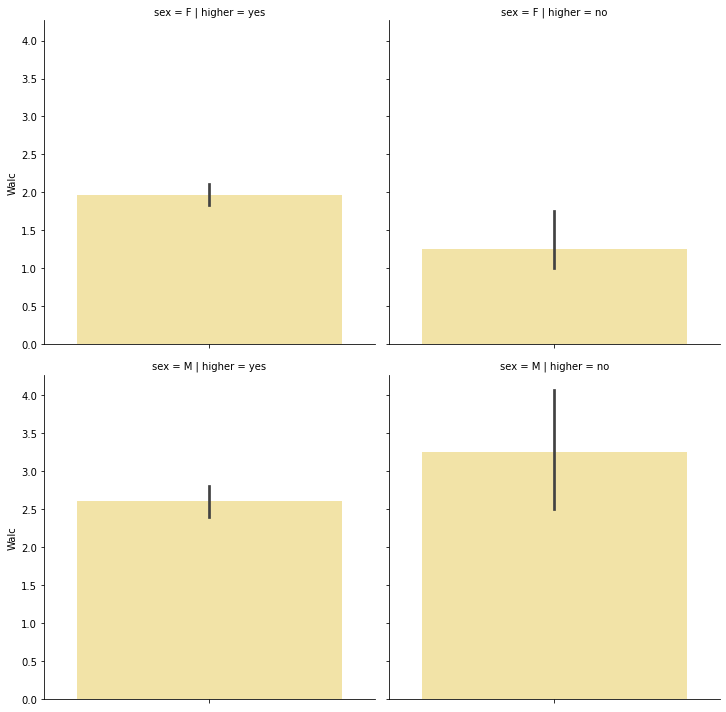

In [52]:
sns.catplot(data=student_data, row='sex', col='higher', y='Walc', kind='bar')

# Visualizing _FIFA_ rankings

## Background

While plotting the number of _migrant workers_ (i.e. slaves) that died on the construction sites for the questionable 2022 world cup in Qatar would allow us to visualize the moral low point of football, it's obviously hard to find such a dataset.
Instead we'll be going with something less controversial: The _FIFA_ rankings of six countries over the span of 25 years.

## Loading And Exploring The Data

You've guessed it: We're taking a first look at the data.

In [ ]:
fifa_data = pd.read_csv('input/fifa_rankings.csv')

In [ ]:
fifa_data.head()

In [ ]:
fifa_data.tail()

In [ ]:
fifa_data.info()

In [ ]:
fifa_data.describe()

## _Wide-Form_- And _Long-Form_-Data

Let's take a closer look at the data:

In [ ]:
fifa_data.sample(10)

The data we're dealing with is in the so-called *__wide-form__*: The rankings of the countries are spread across multiple columns, making each observation be defined by both the value and the respective row (in our case the `Date` would serve as index) and column (in our case the country).

On the contrast in *__long-form__* each observation has an own row - in our case that would consist of the `Date`, the country and the ranking.

We can use _pandas_ to convert from _wide-form_ to _long-form_ as follows:

In [ ]:
fifa_data_long = fifa_data.melt(id_vars=['Date'], var_name='Country', value_name='Ranking')
fifa_data_long

## _Line Plots_

Let's first switch to a qualitative color palette, so we can distinguish the countries in our plots:

In [ ]:
sns.set_palette('Paired')

A **_line plot_** (also known as _line chart_ or _line graph_) is a type of chart which displays information as a series of data points called _markers_ connected by straight line segments. It is similar to a _scatter plot_ except that the measurement points are ordered - typically by their `x`-axis value - and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time, thus the line is often drawn chronologically.

Let's try it out with the _long-form_ dataset we've just created. Note the adjustment of the _ticks_ - i.e. the values used to show specific points on an axis - by using the _extended slice syntax_ (`start:stop:step`) to avoid overcrowding the x-axis. Uncomment the last line to see the difference!

In [ ]:
plt.figure(figsize=(15,5))
line_plot = sns.lineplot(data=fifa_data_long, x='Date', y='Ranking', hue='Country', dashes=False)
xticks = line_plot.get_xticks()
line_plot.set_xticks(xticks[::40]);

As you've seen, with _long-form_ data, we can access variables in the dataset by their name. That is not the case with _wide-form_ data. Nevertheless, because there is a clear association between the dimensions of the table and the variable in the dataset, _seaborn_ is able to assign those variables roles in the plot.

If we pass neither `x` nor `y` parameters, _seaborn_ treats the `data` as _wide-form_:

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=fifa_data, dashes=False)

The plot is pretty crowded: We can use _pandas_ to select only two countries and display them. We can also use _markers_ to show the data points:

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=fifa_data.loc[:,['GER', 'ITA']], dashes=False, marker='o')

## Working With Date And Time

By now you surely ask yourself, if and how we can work with the `Date`-column. Let's take a closer look at it:

In [ ]:
fifa_data['Date'].dtype

N.B.: The `O` stands for _object_ - meaning the series contains _string_ (or mixed) values.

_pandas_ provides a method for parsing dates, which can be passed as single value or series. Note the change of data type:

In [ ]:
fifa_data['Date'] = pd.to_datetime(fifa_data['Date'])
fifa_data['Date']

We can now use `loc` in combination with a boolean mask to select only a specific range we want to visualize:

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fifa_data.loc[('2006-09' < fifa_data['Date']) & (fifa_data['Date'] < '2007-09')], dashes=False)

Now that is pretty cumbersome... fortunately we have a better way!

Let's set the `Date` column as index:

In [ ]:
fifa_data.set_index('Date', inplace=True)
fifa_data.info()

Did you notice the data type of the index?

With a `DatetimeIndex` set, we can now use _slicing_ to achieve the same result with a much more readable syntax:

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fifa_data['2006-09':'2007-09'], dashes=False)

N.B.: We took a slight detour for demonstration purposes - loading, parsing and setting the `DatetimeIndex` can actually be accomplished in one line:

In [ ]:
fifa_data = pd.read_csv('input/fifa_rankings.csv', index_col='Date', parse_dates=True)
fifa_data

## _Rolling Average_

While being great at recognizing trends over a period of time, line plots can get chaotic if there's a lot of fluctuations from observation to observation. For this reason we can use a _rolling average_, also known as _moving average_ and _moving mean_.

The definition is simple: The _rolling average_ is an average of the last $n$ values in a data set, applied row-by-row, so that you get a series of averages.

The application is also simple, thanks to _pandas_:

In [ ]:
fifa_data.rolling(window=5).mean().head(10)

Obviously, the first $n-1$ values can't be calculated.

Let's see, what effects different `window` sizes have on our visualization:

In [ ]:
for i in [5, 15, 45, 130]:
    plt.figure(figsize=(15,5))
    sns.lineplot(data = fifa_data.rolling(window=i).mean() , dashes=False)

# Have Fun Using _Seaborn_!

In [ ]:
spirals_data = pd.read_csv('input/spirals.csv')
leo_colors = sns.xkcd_palette(['red', 'orange', 'golden yellow'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=spirals_data, x='x', y='y', hue='label', palette=leo_colors, legend=False).set(title='HTL Leonding - Schön, hier zu lernen.');